In [15]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Cluster_Analysis_in_Python/datasets/'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# load data

comic_con = pd.read_csv(path_data + 'comic_con.csv')

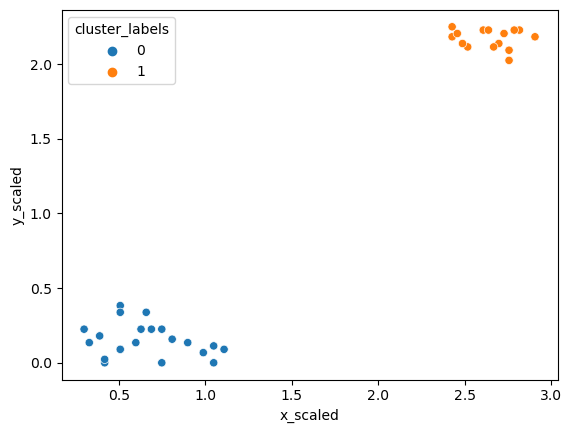

'\nYou are correct! Notice that the clusters formed are exactly the same as hierarchical clustering that you did in the previous chapter.\n'

In [17]:
# exercise 01

"""
K-means clustering: first exercise

This exercise will familiarize you with the usage of k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.

Recall the two steps of k-means clustering:

    Define cluster centers through kmeans() function. It has two required arguments: observations and number of clusters.
    Assign cluster labels through the vq() function. It has two required arguments: observations and cluster centers.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.
"""

# Instructions

"""

    Import kmeans and vq functions in SciPy.
    Generate cluster centers using the kmeans() function with two clusters.
    Create cluster labels using these cluster centers.

"""

# solution

# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']],2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled','y_scaled']],cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

#----------------------------------#

# Conclusion

"""
You are correct! Notice that the clusters formed are exactly the same as hierarchical clustering that you did in the previous chapter.
"""

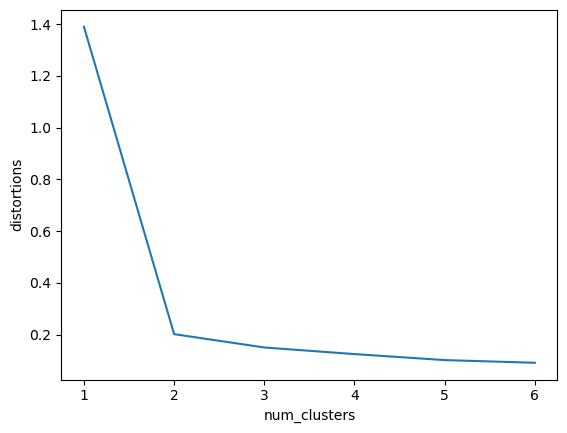

'\n\n'

In [18]:
# exercise 02

"""
Elbow method on distinct clusters

Let us use the comic con dataset to see how the elbow plot looks on a dataset with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.
"""

# Instructions

"""

    Create a list of distortions for each cluster in num_clusters.
    Create a DataFrame elbow_plot with num_clusters and distortions.
    With the .lineplot() method, plot elbow_plot with num_clusters in the x axis and distortions in the y axis.

"""

# solution

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

#----------------------------------#

# Conclusion

"""

"""

In [20]:
# load uniform data
uniform_data = pd.read_csv(path_data + 'uniform_data.csv')

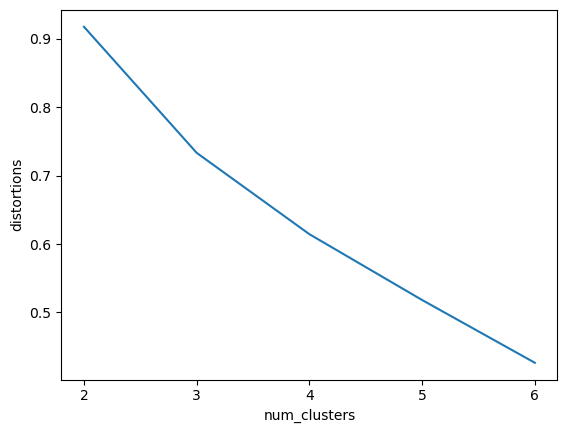

'\nYou are correct. There is no well defined elbow in this plot!\n'

In [21]:
# exercise 03

"""
Elbow method on uniform data

In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a dataset with uniformly distributed points. You may want to display the data points in the IPython Shell before proceeding with the exercise.

The data is stored in a pandas DataFrame, uniform_data. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of points.
"""

# Instructions

"""

    Create a list of distortions for each cluster in num_clusters.
    Create a DataFrame elbow_plot with num_clusters and distortions.
    With the .lineplot() method, plot elbow_plot with num_clusters in the x axis and distortions in the y axis.

"""

# solution

distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled','y_scaled']],i)
    distortions.append(distortion)

# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

#----------------------------------#

# Conclusion

"""
You are correct. There is no well defined elbow in this plot!
"""

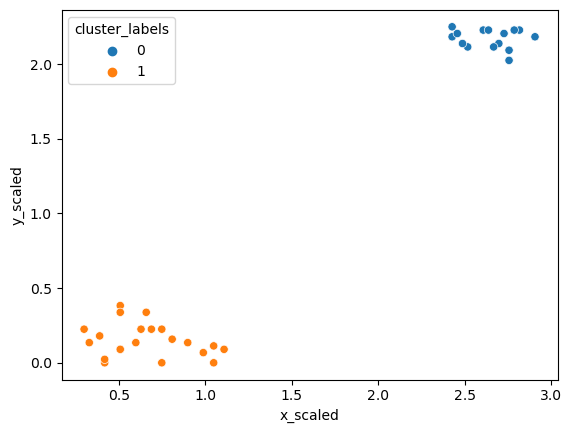

'\nYou are correct! Notice that the plots have not changed after changing the seed as the clusters are well-defined.\n'

In [22]:
# exercise 04

"""
Impact of seeds on distinct clusters

You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.
"""

# Instructions

"""
Import the random class from numpy and initialize the seed with the integer 0.

Change your code from the earlier step so that the seed is initialized with a list [1, 2, 1000].
"""

# solution

# Import random class
from numpy import random

# Initialize seed
random.seed([1,2,1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

#----------------------------------#

# Conclusion

"""
You are correct! Notice that the plots have not changed after changing the seed as the clusters are well-defined.
"""

In [23]:
# load mouse
mouse = pd.read_csv(path_data + 'mouse.csv').dropna()

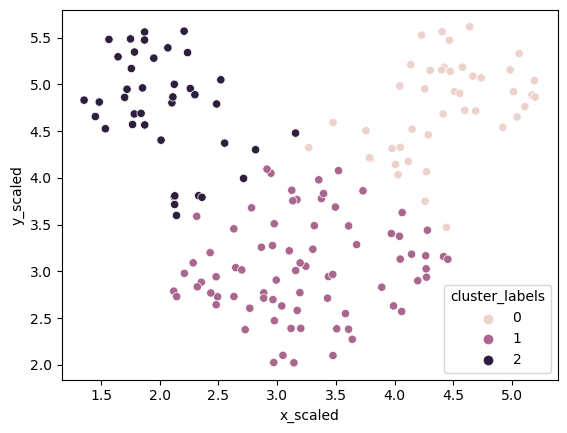

'\nYou are correct! Notice that kmeans is unable to capture the three visible clusters clearly, and the two clusters towards the top have taken in some points along the boundary. This happens due to the underlying assumption in kmeans algorithm to minimize distortions which leads to clusters that are similar in terms of area.\n'

In [24]:
# exercise 05

"""
Uniform clustering patterns

Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

Here is how a typical mouse-like dataset looks like (Source).(https://www.researchgate.net/figure/Clustering-results-for-the-Mouse-data-set-where-the-black-boxes-represent-the-centroids_fig3_256378655)

The data is stored in a pandas DataFrame, mouse. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of the data points.
"""

# Instructions

"""

    Import kmeans and vq functions in SciPy.
    Generate cluster centers using the kmeans() function with three clusters.
    Create cluster labels with vq() with the cluster centers generated above.

"""

# solution

# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled','y_scaled']],3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled','y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

#----------------------------------#

# Conclusion

"""
You are correct! Notice that kmeans is unable to capture the three visible clusters clearly, and the two clusters towards the top have taken in some points along the boundary. This happens due to the underlying assumption in kmeans algorithm to minimize distortions which leads to clusters that are similar in terms of area.
"""

In [25]:
# load fifa
fifa = pd.read_csv(path_data + 'fifa_18_sample_data.csv')

from scipy.cluster.vq import whiten

fifa[['scaled_def','scaled_phy']] = whiten(fifa[['def','phy']])

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


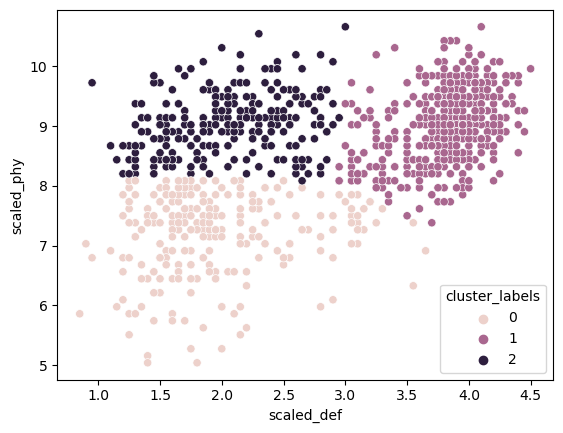

'\nYou are right! Notice that the seed has an impact on clustering as the data is uniformly distributed.\n'

In [26]:
# exercise 06

"""
FIFA 18: defenders revisited

In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

    defending: a number which signifies the defending attributes of a player
    physical: a number which signifies the physical attributes of a player

These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

The following modules have been pre-loaded: kmeans, vq from scipy.cluster.vq, matplotlib.pyplot as plt, seaborn as sns. The data for this exercise is stored in a pandas DataFrame, fifa. The scaled variables are scaled_def and scaled_phy.
"""

# Instructions

"""

    Initialize the random seed to the list [1000,2000].
---

    Fit the scaled data in columns scaled_def and scaled_phy into a k-means clustering algorithm with 3 clusters and assign cluster labels.
---

    Display cluster centers of each cluster with respect to the scaled columns by calculating the mean value for each cluster.
---

    Create a seaborn scatter plot with scaled_def on the x-axis and scaled_phy on the y-axis, with each cluster represented by a different color.

"""

# solution

# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

#----------------------------------#

# Conclusion

"""
You are right! Notice that the seed has an impact on clustering as the data is uniformly distributed.
"""

In [6]:
# exercise 07

"""

"""

# Instructions

"""

"""

# solution



#----------------------------------#

# Conclusion

"""

"""

'\n\n'

In [7]:
# exercise 08

"""

"""

# Instructions

"""

"""

# solution



#----------------------------------#

# Conclusion

"""

"""

'\n\n'

In [8]:
# exercise 09

"""

"""

# Instructions

"""

"""

# solution



#----------------------------------#

# Conclusion

"""

"""

'\n\n'

In [9]:
# exercise 10

"""

"""

# Instructions

"""

"""

# solution



#----------------------------------#

# Conclusion

"""

"""

'\n\n'

In [ ]:
# exercise 11

"""

"""

# Instructions

"""

"""

# solution



#----------------------------------#

# Conclusion

"""

"""